# Exercise 3: $\sqrt{N}$ Upper Limits
 >__Created__:  29 Sep. 2017 Harrison B. Prosper<br>
 >__Updated__:  25 Jun. 2018, adapted for ESHEP 18, HBP<br>
 >__Updated__:  14 Mar. 2023, adapted for CLASHEP 23


In this exercise, we shall determine the relative
frequency with which statements of the form  $$\theta < N + \sqrt{N},$$
are true in an ensemble of 50,000 experiments, each associated with a _different_ mean count $\theta$.
We assume that each experiment yields a _single_ count $N$. Note that in the real world, unless the phenomenon being
investigated does not exist - in which case the mean count is zero, it is highly unlikely that every
experiment in a
random collection of experiments would be associated with _exactly_ the same mean count. 

We shall simulate 
 such an ensemble of experiments by 
sampling their _mean_ counts from a uniform distribution,
$\textrm{uniform}(0, \theta_\max) = 1 \, / \, \theta_\max$, first (Part 1) with mean $\theta_\max = 3$ and then (Part 2)
with mean $\theta_\max = 10$.  Then we'll plot the coverage as a function of $\theta$.

   
Each experiment obtains a count $N$. The statement $$\theta < N + \sqrt{N},$$ is either _True_ of _False_, where $\theta$ is the mean count for that experiment. Ordinarily, we do not know the mean count $\theta$ associated with an experiment. However, in a simulated world we typically do. Therefore, we can determine whether or not each statement is true. In the limit of an infinitely large sample of experiments, the relative frequency with which statements of the form $\theta < N + \sqrt{N}$ are true is called the __coverage__ probability. Note: the latter is a property of the *population* or, as we physicists prefer to say, *ensemble* to which the statements belong and *not* a property of any given statement. Consequently, if a given statement is *imagined* to be a embedded in a different ensemble, then, in general, the coverage probability will change. This is an example of the *reference class problem*. Absolute probabilities do not exist; all are conditional!

__The Frequentist Principle__ The goal of frequentist analyses is to guarantee the following: over an (infinite) ensemble of statements, *which could be about different things*, a minimum fraction, $p = \textrm{CL}$, of these statements will be true. The CL is called the __confidence level__. The clever thing is to invent procedures in which the CL is specified _a priori_. For Gaussian random variables $x$ statements of the form $\mu \in [x - \sigma, x + \sigma]$, where $\mu$ is the mean of the Gaussian, which, in principle, could vary from one  experiment to the next, are true 68.3% of the time.

In [1]:
# standard system modules
import os, sys

# the standard module for array manipulation
import numpy as np

# scientific computing library
import scipy.stats as st

# the standard modules for high-quality plots
import matplotlib as mp
import matplotlib.pyplot as plt
%matplotlib inline

# update fonts
FONTSIZE = 14
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : FONTSIZE}
mp.rc('font', **font)

# set usetex = False if LaTex is not 
# available on your system or if the 
# rendering is too slow
mp.rc('text', usetex=True)

In [2]:
NEXP = 50000  # number of experiments/statements

### Model the experiments

In [3]:
def performExperiments(theta, theta_max=True, ran=np.random, n=NEXP):
    
    # generate n mean values if theta_max is true and 
    # take theta as the maximum value of theta
    if theta_max:
        theta = ran.uniform(0, theta, n)
    
    # for each mean value generate an experimental outcome
    N  = ran.poisson(theta, n)

    # compute upper limits
    U  = N + np.sqrt(N)

    return (theta, N, U)        

### Part 1
Set $\theta_\max = 3$.

In [4]:
theta = 3.0 # maximum theta
theta, N1, U1 = performExperiments(theta, theta_max=True)

K   = 10
fmt = ' %5.2f' * K
print('theta', fmt % tuple(theta[:K]))
print('N    ', fmt % tuple(N1[:K]))
print('U    ', fmt % tuple(U1[:K]))

theta   0.62  1.22  2.19  1.89  0.78  0.34  2.93  2.61  1.99  2.36
N       1.00  0.00  2.00  2.00  1.00  2.00  2.00  7.00  3.00  2.00
U       2.00  0.00  3.41  3.41  2.00  3.41  3.41  9.65  4.73  3.41


__Analyze results of experiments__ 

Relative frequency $p = k \, / \, n$ with rough measure of uncertainty $\sqrt{n p (1 - p)} \, / \, n$.

In [5]:
def computeCoverage(theta, U): 
    
    # number of experiments
    n = len(U)
    
    # determine true and false statements
    t = theta < U
    
    # compute coverage probability 
    # (i.e., fraction of true statements)
    k  = t.sum()     # number of true statements
    p  = float(k)/n
    
    # since we have k true statements our of n, this is a binomial
    # problem with variance n*p*(1-p). Therefore, a rough estimate
    # of the uncertainty in p is
    dp = np.sqrt(n*p*(1-p))/n
    
    return (p, dp)

In [6]:
results = computeCoverage(theta, U1)

print(f"coverage: {results[0]:8.3f} {results[1]:8.3f}")

coverage:    0.613    0.002


### Part 2
Set $\theta_\max = 10$.

In [8]:
theta = 10.0    # max theta
theta, N2,U2 = performExperiments(theta, theta_max=True)
results      = computeCoverage(theta, U2)

print(f"coverage: {results[0]:8.3f} {results[1]:8.3f}")

coverage:    0.730    0.002


### Part 3
Plot coverage as a function of $\theta$. This is an upper limit, so for large $N$ we expect the confidence level to be that of a single-sided 1-standard deviation interval.

In [23]:
theta   = np.arange(0.1, 10.0, 0.05)

expts   = [performExperiments(x, theta_max=False) for x in theta]

results = [(t, computeCoverage(t, u)[0]) for t, _, u in expts]

results = np.array(results).T
print(f'shape: {str(results.shape):s}')

theta   = results[0]
coverage= results[1]

shape: (2, 198)


In [24]:
def plot_coverage(x, y, filename="rootN_coverage.png"):
    
    # create an empty figure
    fig = plt.figure(figsize=(5, 5))
    fig.tight_layout()
    
    # add a subplot to it
    nrows, ncols, index = 1,1,1
    ax  = fig.add_subplot(nrows,ncols,index)

    xmin= 0
    xmax= 2*x[-1]-x[-2]
    ax.set_xlim(xmin, xmax)
    ax.set_xlabel(r'$\theta$', fontsize=FONTSIZE)
    
    ymin= 0
    ymax= 1
    ax.set_ylim(ymin, ymax)
    ax.set_ylabel(r'$P(\theta < \overline{\theta}(N)|\theta)$', 
                  fontsize=FONTSIZE) 
    
    #ax.set_title("coverage")
    
    ax.plot(x, y, 'b', lw=1, label='coverage')
    
    # compute 1-sided confidence level assuming we're
    # in the Gaussian limit.
    x  = 1
    df = 1
    p  = st.chi2.cdf(x, df)
    CL = (1+p)/2
    print(f'CL: {CL:7.3f}')
    
    ax.plot([xmin, xmax], [CL, CL], 'r', lw=1, label='CL')

    ax.grid(True, which="both", linestyle='-')
    ax.legend(loc='lower right')
    
    plt.savefig(filename)
    plt.show()

CL:   0.841


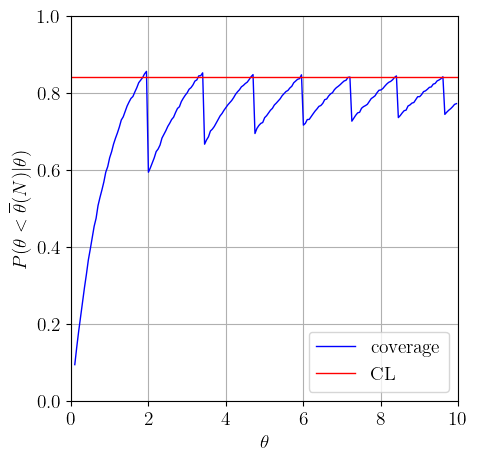

In [25]:
plot_coverage(theta, coverage)

...Repeat with much longer range

shape: (2, 400)
CL:   0.841


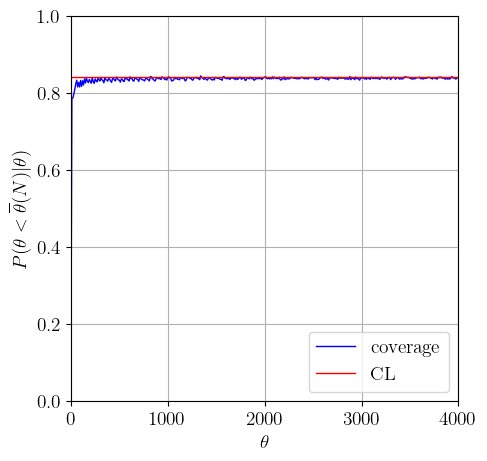

In [26]:
theta   = np.arange(0.1, 4000.0, 10)
expts   = [performExperiments(x, theta_max=False) for x in theta]
results = [(t, computeCoverage(t, u)[0]) for t, _, u in expts]

results = np.array(results).T
print(f'shape: {str(results.shape):s}')

theta   = results[0]
coverage= results[1]
plot_coverage(theta, coverage, 
              filename='rootn_coverage_range_4000.png')